Import required libraries

In [74]:
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

Load data set and reshaping the array

In [55]:
# Load data set
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

# Reshaping the array to 4-dimsions
x_train = x_train_original.reshape(x_train_original.shape[0], 28, 28, 1)
x_test = x_test_original.reshape(x_test_original.shape[0], 28, 28, 1)

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Create categorical class label data for loss function
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Show the first ten records

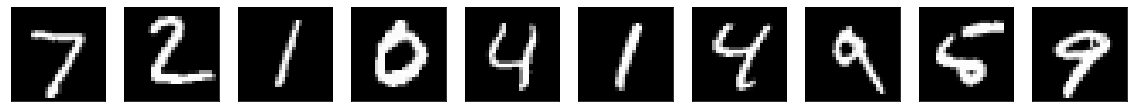

In [56]:
# 10 original records
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Encode process

In [57]:
input_img = Input(shape=(28, 28, 1))  

# First convolution encode layer
stride = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
stride = MaxPooling2D(pool_size = (2, 2), padding='same')(stride)

# Second convolution encode layer
stride = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(stride)
stride = MaxPooling2D(pool_size = (2, 2), padding='same')(stride) 

# Third convolution encode layer
stride = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(stride)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(stride)


Decode process

In [58]:
# First convolution decode layer
stride = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
stride = UpSampling2D((2, 2))(stride)

# Second convolution decode layer
stride = Conv2D(8, (3, 3), activation='relu', padding='same')(stride)
stride = UpSampling2D((2, 2))(stride)

# Third convolution decode layer
stride = Conv2D(16, (3, 3), activation='relu')(stride)
stride = UpSampling2D((2, 2))(stride)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(stride)

Build model

In [59]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train model

In [61]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2147 - val_loss: 0.1668
Epoch 2/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1551 - val_loss: 0.1417
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1409 - val_loss: 0.1297
Epoch 4/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1327 - val_loss: 0.1286
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1274 - val_loss: 0.1246
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1236 - val_loss: 0.1250
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1204 - val_loss: 0.1159
Epoch 8/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1181 - val_loss: 0.1137
Epoch 9/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1162 - val_loss: 0.1150
Epoch

Print out the first ten original images and the predictions for the same ten images

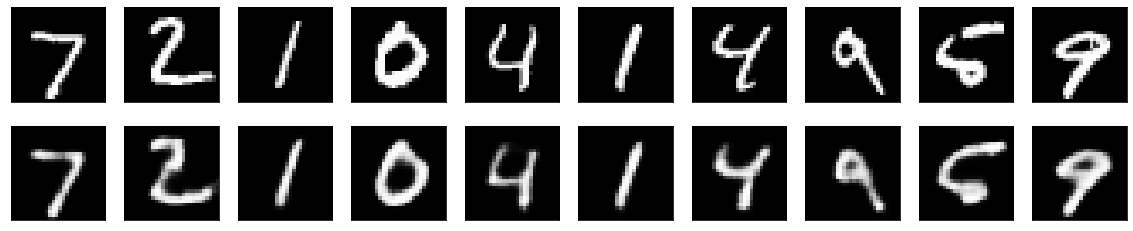

In [62]:
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Add noise to data set

In [67]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

The first ten noisy images

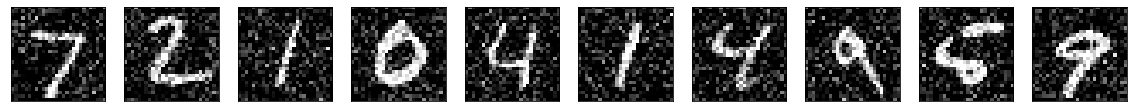

In [68]:
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train the model with the noisy data

In [69]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1211 - val_loss: 0.1255
Epoch 2/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1183 - val_loss: 0.1149
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1168 - val_loss: 0.1151
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1160 - val_loss: 0.1162
Epoch 5/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1156 - val_loss: 0.1095
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1146 - val_loss: 0.1130
Epoch 7/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1141 - val_loss: 0.1141
Epoch 8/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1134 - val_loss: 0.1078
Epoch 9/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.1128 - val_loss: 0.1089
Epoch

Print out the first ten noisy images as well as the corresponding de-noised images

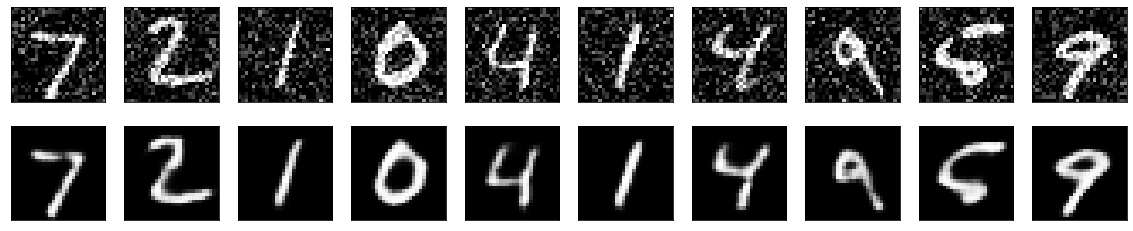

In [70]:
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Build the CNN model

In [75]:
# Convolutional model
model = Sequential()

# First convolution layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Second convolution layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Third convolution layer with flattern
model.add(Conv2D(128, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))

# Fully connected layer one
model.add(Dense(625, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer two
model.add(Dense(10, activation='softmax'))

Create noise data set

In [79]:
train_imgs = autoencoder.predict(x_train_noisy)
test_imgs = autoencoder.predict(x_test_noisy)

Evaluate the model accuracy

In [80]:
# Check accuracy and loss values agains different epoch values
number_of_epochs = [5, 10, 15, 20, 25]
accuracy = []
loss = []

for number in number_of_epochs:
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(train_imgs, y_train, epochs=number, batch_size=128, shuffle=True, verbose=1)
  evaluation = model.evaluate(test_imgs, y_test, batch_size=256, verbose=1)
  
  loss.append(evaluation[0])
  accuracy.append(evaluation[1])

Epoch 1/5
60000/60000 [==============================] - 16s 274us/step - loss: 0.6516 - accuracy: 0.7810
Epoch 2/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.2979 - accuracy: 0.9058
Epoch 3/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.2557 - accuracy: 0.9178
Epoch 4/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.2330 - accuracy: 0.9262
Epoch 5/5
10000/10000 [==============================] - 1s 65us/step
Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.2060 - accuracy: 0.9345
Epoch 2/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1925 - accuracy: 0.9382
Epoch 3/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1864 - accuracy: 0.9406
Epoch 4/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.1803 - accuracy: 0.9420
Epoch 5/10
60000/60000 [==============================] - 16s 266us/step - los

Accuracy data table and loss data table

In [81]:
# Show previos evaluate values
index = 0
for value in accuracy:
  print('Epoch number : %.2d, Accuracy : %.5f' % (number_of_epochs[index], value))
  index = index + 1


index1 = 0
for value in loss:
  print('Epoch number : %.2d, Loss : %.5f' % (number_of_epochs[index1], value))
  index1 = index1 + 1

Epoch number : 05, Accuracy : 0.95250
Epoch number : 10, Accuracy : 0.96180
Epoch number : 15, Accuracy : 0.96770
Epoch number : 20, Accuracy : 0.96880
Epoch number : 25, Accuracy : 0.96940
Epoch number : 05, Loss : 0.14218
Epoch number : 10, Loss : 0.11404
Epoch number : 15, Loss : 0.10457
Epoch number : 20, Loss : 0.10324
Epoch number : 25, Loss : 0.10242


Plot result data

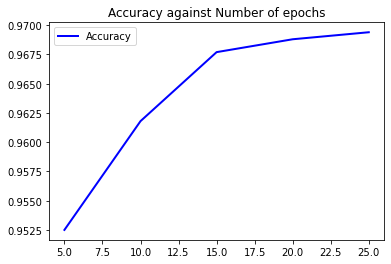

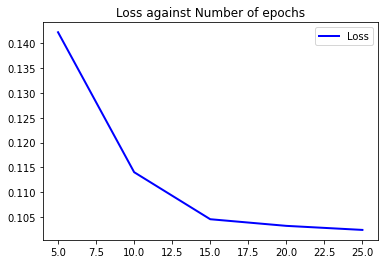

In [82]:
# Plot the evaluate results
plt.title('Accuracy against Number of epochs')
plt.plot( number_of_epochs, accuracy, color='blue', linewidth=2, label = "Accuracy")
plt.legend()
plt.show()

print("\n\n")

plt.title('Loss against Number of epochs')
plt.plot( number_of_epochs, loss, color='blue', linewidth=2, label = "Loss")
plt.legend()
plt.show()